In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
spark

In [3]:
from pyspark.sql.functions import *

In [40]:
# load user data
user_data = spark.read.csv('file:///home/hadoop/Downloads/users.txt', inferSchema=True, header=True)

# load follower's data
follower_data = spark.read.csv('file:///home/hadoop/Downloads/followers.txt', inferSchema=True, header=True)

## Setup Spark for graphframes

In [41]:
user_data

DataFrame[user_id: int, user_name: string, full_name: string]

In [42]:
user_data.show()

+-------+------------+------------+
|user_id|   user_name|   full_name|
+-------+------------+------------+
|      1|amitmishra08| amit mishra|
|      2|    sharon_1|sharon dcruz|
|      3|   naveen007|naveen rajan|
|      4|   allen_456|  allen bose|
|      5|    siva2109|    siva rao|
|      6| bhagya10200|      bhagya|
|      7|  devika9091|   devika T.|
|      8|   anonymous|          NA|
+-------+------------+------------+



In [43]:
follower_data

DataFrame[follower_id: int, followee_id: int, relationship: string]

In [44]:
follower_data.show()

+-----------+-----------+------------+
|follower_id|followee_id|relationship|
+-----------+-----------+------------+
|          1|          2|      follow|
|          2|          3|      follow|
|          2|          4|      friend|
|          4|          2|      friend|
|          3|          1|      follow|
|          1|          4|      follow|
|          4|          7|      follow|
|          7|          8|      follow|
|          1|          6|      follow|
|          5|          6|      friend|
|          6|          5|      friend|
+-----------+-----------+------------+



In [9]:
!pip install graphframes

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from graphframes import GraphFrame

In [46]:
# create a vertices and edges GraphFrame
vertices = user_data.withColumnRenamed('user_id', 'id').select('id', 'user_name')

In [56]:
edges = follower_data.withColumnRenamed('follower_id', 'src')\
.withColumnRenamed('followee_id', 'dst')\
.withColumnRenamed('relationship','relationship')

In [57]:
# create a GraphFrame = Property Graph using vertices and edges
graph = GraphFrame(vertices, edges)

In [58]:
ranks = graph.pageRank(resetProbability=0.15, maxIter=20)

In [59]:
ranks.vertices.orderBy(ranks.vertices.pagerank.desc()).show()

+---+------------+------------------+
| id|   user_name|          pagerank|
+---+------------+------------------+
|  6| bhagya10200| 2.147717418684948|
|  5|    siva2109|2.0510251053875987|
|  4|   allen_456| 0.711853006554833|
|  2|    sharon_1| 0.711853006554833|
|  1|amitmishra08|0.6655130949119862|
|  8|   anonymous|0.6655130949119862|
|  3|   naveen007|0.5232626364969075|
|  7|  devika9091|0.5232626364969075|
+---+------------+------------------+



In [51]:
ranks

GraphFrame(v:[id: int, user_name: string ... 1 more field], e:[src: int, dst: int ... 2 more fields])

In [52]:
graph.vertices.show()

+---+------------+
| id|   user_name|
+---+------------+
|  1|amitmishra08|
|  2|    sharon_1|
|  3|   naveen007|
|  4|   allen_456|
|  5|    siva2109|
|  6| bhagya10200|
|  7|  devika9091|
|  8|   anonymous|
+---+------------+



In [53]:
graph.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  1|       1|
|  6|       2|
|  3|       1|
|  5|       1|
|  4|       2|
|  8|       1|
|  7|       1|
|  2|       2|
+---+--------+



In [54]:
graph.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  1|        3|
|  6|        1|
|  3|        1|
|  5|        1|
|  4|        2|
|  7|        1|
|  2|        2|
+---+---------+



In [55]:
graph.stronglyConnectedComponents(maxIter=20).show()

+---+------------+---------+
| id|   user_name|component|
+---+------------+---------+
|  4|   allen_456|        1|
|  1|amitmishra08|        1|
|  6| bhagya10200|        5|
|  3|   naveen007|        1|
|  7|  devika9091|        7|
|  8|   anonymous|        8|
|  5|    siva2109|        5|
|  2|    sharon_1|        1|
+---+------------+---------+



## Create a network graph

In [65]:
!pip3 install networkx

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 8.2 MB/s            
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [72]:
import networkx as nx

In [73]:
ns_graph = nx.DiGraph()
edges_df = edges.toPandas()
for _,row in edges_df.iterrows():
    ns_graph.add_edge(row['src'], row['dst'])

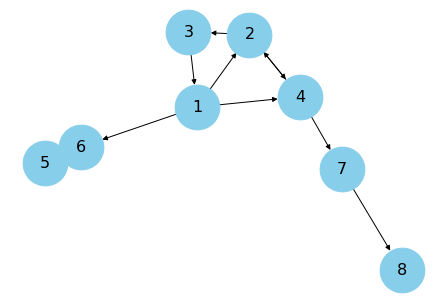

In [75]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(ns_graph)
nx.draw(ns_graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=16, arrows=True)
plt.show()